{{badge}}

**<h1>Skewness**

* It is the *`degree of distortion`* from the symmetrical bell curve or the normal distribution.
* It measures the lack of symmetry in data ditribution.
* It differentiates extreme values in one versus the other trail.
* A symmetrical distribution will have skewness of **0**.
<br>

There are two types of Skewness: **Positive and Negative**.

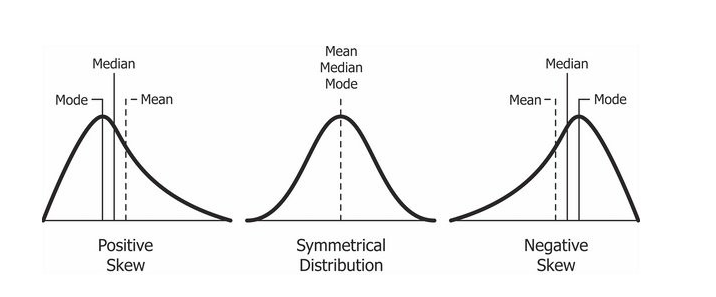

* **Positive Skewness**: The tail on the right side of the distribution is **longer or fatter**. **Mean** and **median** will be greater than the **mode**.
* **Negative Skewness**: The tail of the left side of distribution is **longer or fatter**. **Mean** and **median** will be less than the **mode**.

**<h3>So, when is the skewness too much?**

* If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
* If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data is **moderately skewed**.
* If the skewness is less than -1 (negatively skewed) or greater than 1 (positively skewed), the data is **highly skewed**.

**<h3>Example**

* Let's take an example of house prices. Suppose we have house values rangin from \$100K to \$1,000,000 with the mean being \$500,000.
* If the peak of the distribution is left of the mean value -- **Positive skewness**.
* It would mean that many houses were being sold for less than the average value i.e \$500K.
* If the peak of the distribution is right of the mean value -- **Negative skewness**.
* It would mean that many houses were being sold for more than the average value i.e \$500K.

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(x) ))

excess kurtosis of normal distribution (should be 0): 0.0023151144732005413
skewness of normal distribution (should be 0): 0.004127721962986286


In [ ]:
import getpass as gt

user = input('Provide Kaggle Username : ')
api = gt.getpass('API key for '+ user +' :')
print('')


!mkdir ~/.kaggle

!touch ~/.kaggle/kaggle.json

kaggle_api_key = {'username':user, 'key':api}

import json

with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(kaggle_api_key, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vinodkumar9576/finding-donor-for-charity

from zipfile import ZipFile
import pandas as pd

with ZipFile('/content/finding-donor-for-charity.zip','r') as z:
  train_df = pd.read_csv(z.open('census.csv'))

#printing files in donwloaded zip file
print(' ')
print('Files in downloaded zip folder')
for names in ZipFile('/content/finding-donor-for-charity.zip').namelist():
  print(names)

  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 34.3MB/s]
 
Files in downloaded zip folder
census.csv
example_submission.csv
test_census.csv


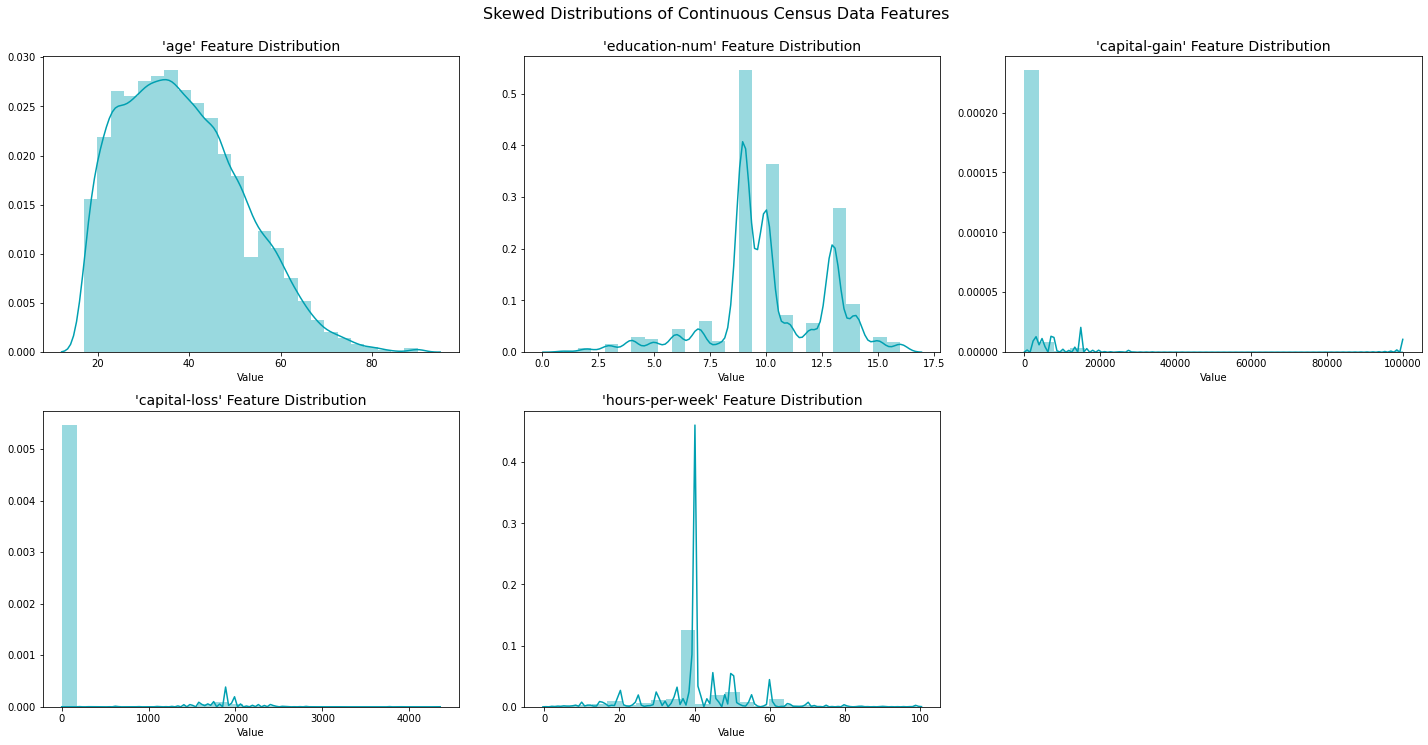

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

for k,feature in enumerate(train_df.select_dtypes(include=['int64','float64']).columns):
  ax = fig.add_subplot(2,3,k+1)
  x=train_df[feature]
  sns.distplot(x, bins = 25, color = '#00a0b1')
  ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
  ax.set_xlabel("Value")
  #ax.set_ylabel("Number of Records")

fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()

* From above plots of continous data features, found two features fit the conditions: 'capital-gain' and 'capital-loss'.
* Now we calcualte the skewness for the 'capital-gain' and 'capital-loss'.

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

cg = train_df['capital-gain']
cl = train_df['capital-loss']

#print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(cg) ))
print( 'skewness of Capital-gain distribution (should be 0): {}'.format( skew(cg) ))
print( 'skewness of Capital-loss distribution (should be 0): {}'.format( skew(cl) ))

skewness of Capital-gain distribution (should be 0): 11.788611139067774
skewness of Capital-loss distribution (should be 0): 4.516154347164751


**<h1>Kurtosis**

* Kurtosis is all about the tails of the distribution -- not the peakedness or flatness.
* It is used to describe the exreme values in one versus the other tail.
* It is actually the measure of outliers present in the distribution.
* It is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a **normal distribution**.
* It defines whether the tails of a given distribution contain exreme values.

**Example:**
* In finance, kurtosis is used as measure of **financial risk**. A large kurtosis is associated with a **high level of risk** of an investment because it indicates that there are high probabilities of exremely large and extremely small returns.
* On the other hand, a small kurtosis signals a **moderate level of risk** because the probabilities of extreme returns are relatively low.

**<h2>Types of Kurtosis**

**High kurtosis** in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. Investigate!<br><br>
**Low kurtosis** in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.

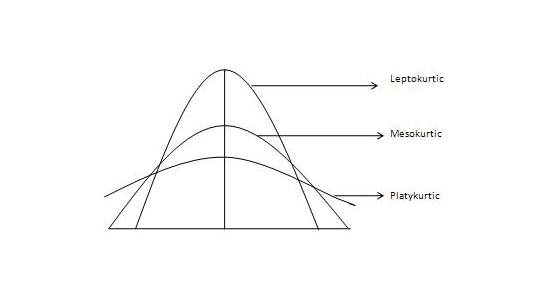

**Mesokurtic:** This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.
<br><br>
**Leptokurtic (Kurtosis > 3):** Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. 
Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
<br><br>
**Platykurtic: (Kurtosis < 3):** Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
The reason for this is because the extreme values are less than that of the normal distribution.

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

cg = train_df['capital-gain']
cl = train_df['capital-loss']

#print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(cg) ))
print( 'Kurtosis of Capital-gain distribution (should be 0): {}'.format( kurtosis(cg) ))
print( 'Kurtosis of Capital-loss distribution (should be 0): {}'.format( kurtosis(cl) ))

Kurtosis of Capital-gain distribution (should be 0): 150.13455854137842
Kurtosis of Capital-loss distribution (should be 0): 19.361695898702166
